In [4]:
import numpy as np
from importlib import reload
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse as mplEllipse
from mpl_toolkits.mplot3d import Axes3D

## expansion of parafine wax with temeperature

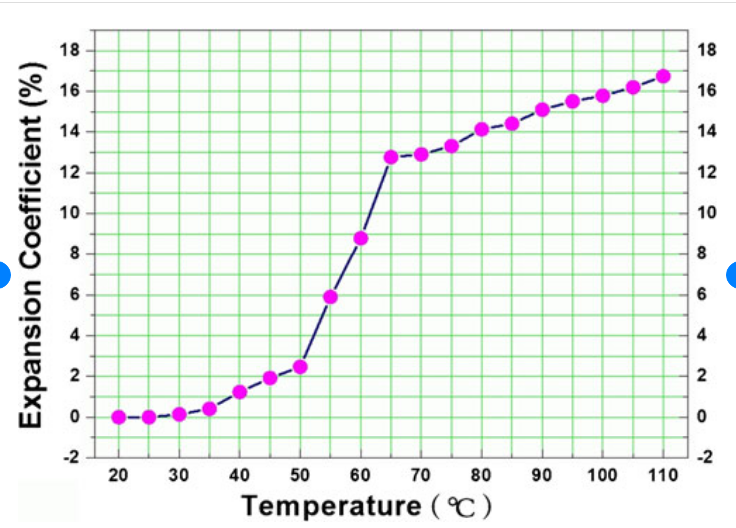

The specific wax used in lava lamp melts at around 45 degrees celsius. They add some oil in it. So we approximate this material by a using only the linear behaviour at arbitary temperature

In [5]:
T0=20
k=-1
e_T=0.001
rho0=1.05
V0=1
g=10
rho_w=1

Text(0, 0.5, 'expansion')

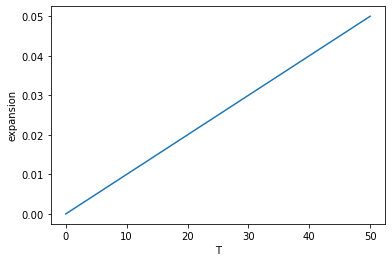

In [6]:
def e(T): return e_T*T#=0.13
TT=np.linspace(0,50)
plt.plot(TT,e(TT))
plt.xlabel('T');plt.ylabel('expansion')

## calculate density
parafine wax has density of 0.9, but with the oil inside is just a bit more than the water, so right now let's say 1.05

Text(0, 0.5, 'density')

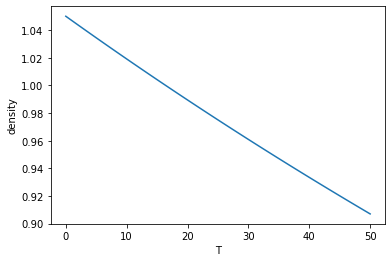

In [7]:
def rho(T,rho0): return rho0/(1+e(T))**3
plt.plot(TT,rho(TT,rho0))
plt.xlabel('T');plt.ylabel('density')

## thermal distribution inside the lamp
lets say for now a square root behaviour, need to solve the transfer equation

Text(0, 0.5, 'T')

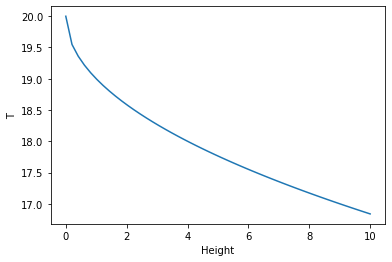

In [42]:
def Trod(y,T0,k): return T0+k*y**(0.5)
#def Trod(y,T0,k): return T0*np.exp(k*y)
yy=np.linspace(0,10)
plt.plot(yy,Trod(yy,T0,k))
plt.xlabel('Height');plt.ylabel('T')

Text(0, 0.5, 'density')

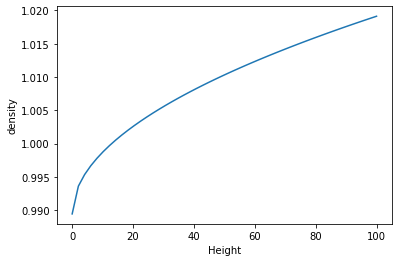

In [43]:
yy=np.linspace(0,100)
plt.plot(yy,rho(Trod(yy,T0,k),rho0))
plt.xlabel('Height');plt.ylabel('density')

In [44]:
from scipy.integrate import odeint
def dY_dt(Y,t,rho_w,T0,k,rho0,g,u): 
    y,v,T=Y
    dy=v
    dv=(rho_w/rho(T,rho0)-1)*g
    dT=-u*(T-Trod(y,T0,k)) #newton cooling
#     if Y[0]>=20:
#         return [0,20]
#     else:
    return [dy,dv,dT]

In [45]:
tt=np.linspace(0,150,1000)
Y0=[0,0,20]

In [56]:
A=odeint(dY_dt,Y0,tt,args=(rho_w,T0,k,rho0,g,0.1))

/home/astromix/miniconda3/envs/ARCenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


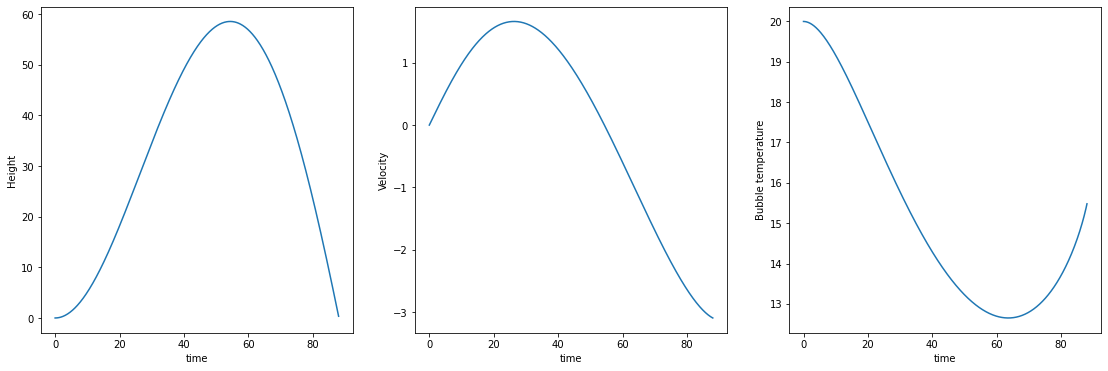

In [57]:
fig,ax=plt.subplots(1,3,figsize=(19,6))
ax[0].plot(tt,A[:,0]); ax[0].set(ylabel='Height')
ax[1].plot(tt,A[:,1]); ax[1].set(ylabel='Velocity')
ax[2].plot(tt,A[:,2]); ax[2].set(ylabel='Bubble temperature')
for axi in ax: axi.set(xlabel='time') 

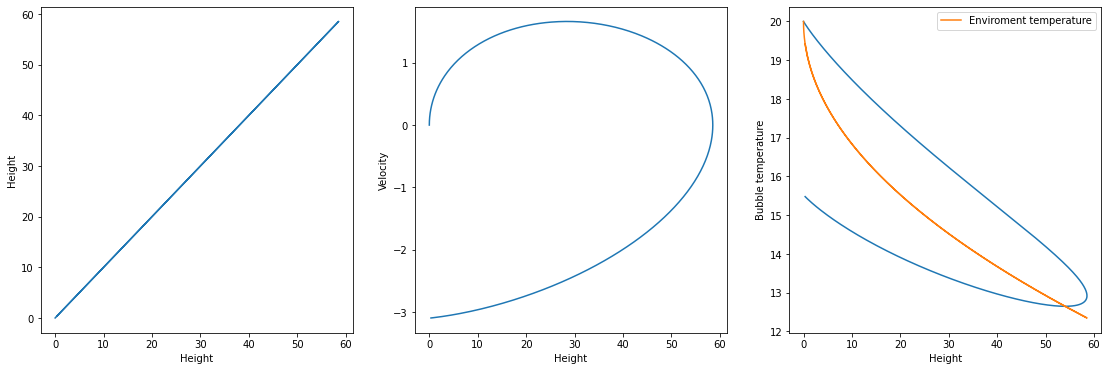

In [58]:
fig,ax=plt.subplots(1,3,figsize=(19,6))
ax[0].plot(A[:,0],A[:,0]); ax[0].set(ylabel='Height')
ax[1].plot(A[:,0],A[:,1]); ax[1].set(ylabel='Velocity')
ax[2].plot(A[:,0],A[:,2]); ax[2].set(ylabel='Bubble temperature')
ax[2].plot(A[:,0],Trod(A[:,0],T0,k),label='Enviroment temperature'); ax[2].legend()
for axi in ax: axi.set(xlabel='Height') 

In [112]:
def V(y,T0,k,rho0,V0): return rho0*V0/rho(T(y,T0,k),rho0)

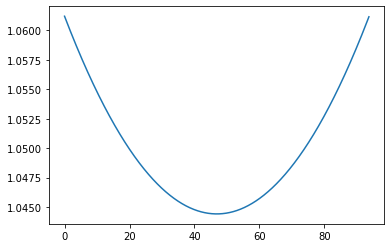

In [113]:
plt.plot(tt,V(A[:,0],T0,k,rho0,V0))